In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [38]:
# Loading a predictive model
rf_model = joblib.load('rf_model.joblib')
rf_model

RandomForestRegressor(max_depth=20, max_features=0.9406014627190983,
                      n_estimators=418, random_state=42)

# Reading the Dataset

In [39]:
data = pd.read_excel('final_dataset.xlsx')
data.head()

,full_name,age,height,citizenship,player_agent,current_club,joined,outfitter,social_media,link,...,club_trophies_total_score,club_trophies_average_score,club_trophies_max_score,club_trophies_min_score,club_trophies_amount,Defender_Group,Midfielder_Group,Striker_Group,Winger_Group,followers
0,Joško Gvardiol,22.0,1.85,Croatia,1,Manchester City,7,0,"('Instagram', 'http://www.instagram.com/josko_...",https://www.transfermarkt.com/josko-gvardiol/p...,...,303,37.875,81,8,9,2,0,0,0,1199636
1,Nathan Benjamin Aké,29.0,1.80,Netherlands Cote d'Ivoire,1,Manchester City,43,1,http://www.instagram.com/nathanake/,https://www.transfermarkt.com/nathan-ake/profi...,...,303,37.875,81,8,9,2,0,0,0,2227475
2,Sergio Gómez Martín,23.0,1.71,Spain,1,Manchester City,18,0,http://www.instagram.com/sergiogm_10/,https://www.transfermarkt.com/sergio-gomez/pro...,...,303,37.875,81,8,9,1,0,0,1,475430
3,Kyle Andrew Walker,33.0,1.78,England,1,Manchester City,79,1,http://www.instagram.com/kylewalker2/,https://www.transfermarkt.com/kyle-walker/prof...,...,303,37.875,81,8,9,1,0,0,1,4911531
4,Matheus Luiz Nunes,25.0,1.83,Portugal Brazil,1,Manchester City,6,0,"('Instagram', 'http://www.instagram.com/matheu...",https://www.transfermarkt.com/matheus-nunes/pr...,...,303,37.875,81,8,9,0,2,0,0,447746


In [14]:
print(f"Number of rows in the dataset: {data.shape[0]}")
print(f"Number of columns in the dataset: {data.shape[1]}")

Number of rows in the dataset: 16140
Number of columns in the dataset: 61


In [15]:
data = data.fillna(0)

print("Fill missing values with zero")
print("Missing values:", data.isna().sum().sum())

Fill missing values with zero
Missing values: 0


In [40]:
relevant_features = [
    'age',
     'height',
     'player_agent',
     'joined',
     'outfitter',
     'appearances',
     'goals',
     'assists',
     'substitutions_on',
     'substitutions_off',
     'yellow_cards',
     'red_cards',
     'penalty_goals',
     'minutes_played',
     'individual',
     'international',
     'national',
     'other',
     'national_status',
     'national_matches',
     'national_goals',
     'national_assists',
     'national_yellow_cards',
     'national_red_cards',
     'avg_injuries_per_season',
     'avg_injury_duration',
     'is_injured',
     'last_injury_date',
     'club_price',
     'club_statistics_matches',
     'club_statistics_goals',
     'club_statistics_pts',
     'club_league_top_rank',
     'club_league_lowest_rank',
     'club_league_mean_rank',
     'foot_left',
     'foot_right',
     'trophies_total_score',
     'trophies_average_score',
     'trophies_max_score',
     'trophies_min_score',
     'trophies_amount',
     'club_trophies_total_score',
     'club_trophies_average_score',
     'club_trophies_max_score',
     'club_trophies_min_score',
     'club_trophies_amount',
     'Defender_Group',
     'Midfielder_Group',
     'Striker_Group',
     'Winger_Group',
     'followers'
]

In [19]:
# Predicting values
predicted_prices = rf_model.predict(data[relevant_features])
data['predicted_price'] = predicted_prices 

In [22]:
data

,full_name,age,height,citizenship,player_agent,current_club,joined,outfitter,social_media,link,...,club_trophies_average_score,club_trophies_max_score,club_trophies_min_score,club_trophies_amount,Defender_Group,Midfielder_Group,Striker_Group,Winger_Group,followers,predicted_price
0,Joško Gvardiol,22.0,1.85,Croatia,1,Manchester City,7,0,"('Instagram', 'http://www.instagram.com/josko_...",https://www.transfermarkt.com/josko-gvardiol/p...,...,37.875,81,8,9,2,0,0,0,1199636,7.004785e+07
1,Nathan Benjamin Aké,29.0,1.80,Netherlands Cote d'Ivoire,1,Manchester City,43,1,http://www.instagram.com/nathanake/,https://www.transfermarkt.com/nathan-ake/profi...,...,37.875,81,8,9,2,0,0,0,2227475,4.555263e+07
2,Sergio Gómez Martín,23.0,1.71,Spain,1,Manchester City,18,0,http://www.instagram.com/sergiogm_10/,https://www.transfermarkt.com/sergio-gomez/pro...,...,37.875,81,8,9,1,0,0,1,475430,1.295622e+07
3,Kyle Andrew Walker,33.0,1.78,England,1,Manchester City,79,1,http://www.instagram.com/kylewalker2/,https://www.transfermarkt.com/kyle-walker/prof...,...,37.875,81,8,9,1,0,0,1,4911531,1.697847e+07
4,Matheus Luiz Nunes,25.0,1.83,Portugal Brazil,1,Manchester City,6,0,"('Instagram', 'http://www.instagram.com/matheu...",https://www.transfermarkt.com/matheus-nunes/pr...,...,37.875,81,8,9,0,2,0,0,447746,4.960048e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,João Vítor de Oliveira Florêncio,26.0,1.82,Brazil,0,Nadur Youngsters FC,8,0,0,https://www.transfermarkt.com/robinho/profil/s...,...,0.000,0,2,0,0,0,1,1,0,1.200967e+05
16136,Rafael Conrado Prudente,29.0,1.89,Brazil,0,Oratory Youths FC,1,0,0,https://www.transfermarkt.com/rafael-conrado/p...,...,0.000,0,2,0,0,0,2,0,0,8.002208e+04
16137,Johandre Jose Padilla Vasquez,26.0,1.82,Colombia,0,Ghajnsielem FC,2,0,0,https://www.transfermarkt.com/johandre-padilla...,...,0.000,0,2,0,2,0,0,0,0,3.367613e+04
16138,Cláudio Henrique da Silva Barboza,25.0,1.64,Brazil,0,Ghajnsielem FC,7,0,0,https://www.transfermarkt.com/claudio-murici/p...,...,0.000,0,2,0,0,0,1,1,0,4.516357e+04


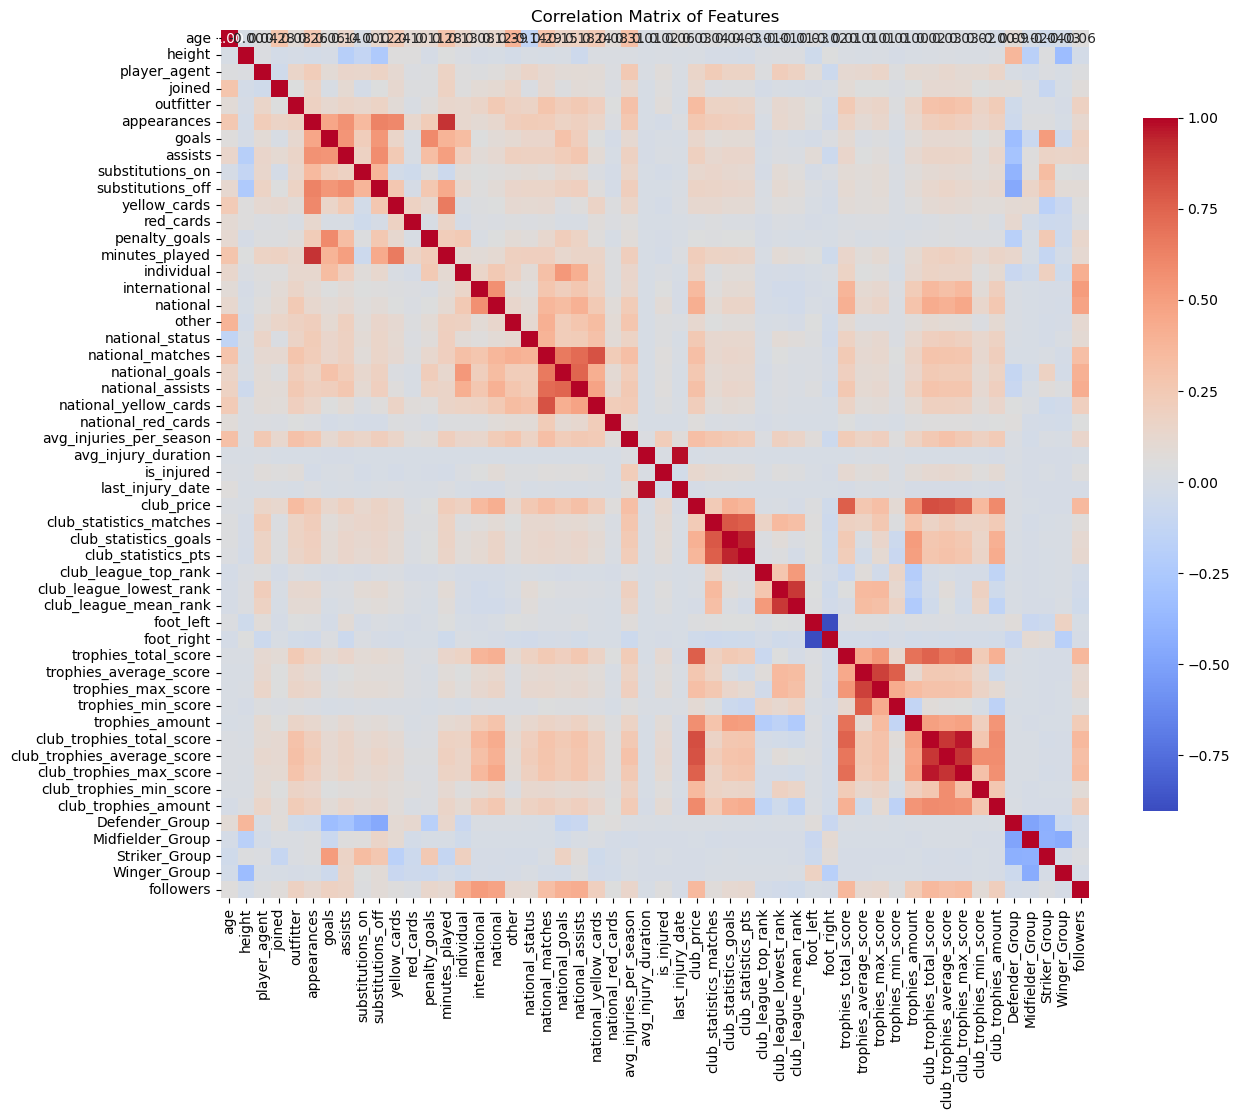

In [24]:
feature_data = data[relevant_features]

corr_matrix = feature_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 12))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Matrix of Features")
plt.savefig("correlation_matrix.png")  # Save the figure as a PNG file
plt.show()

# Feature Importance Analysis

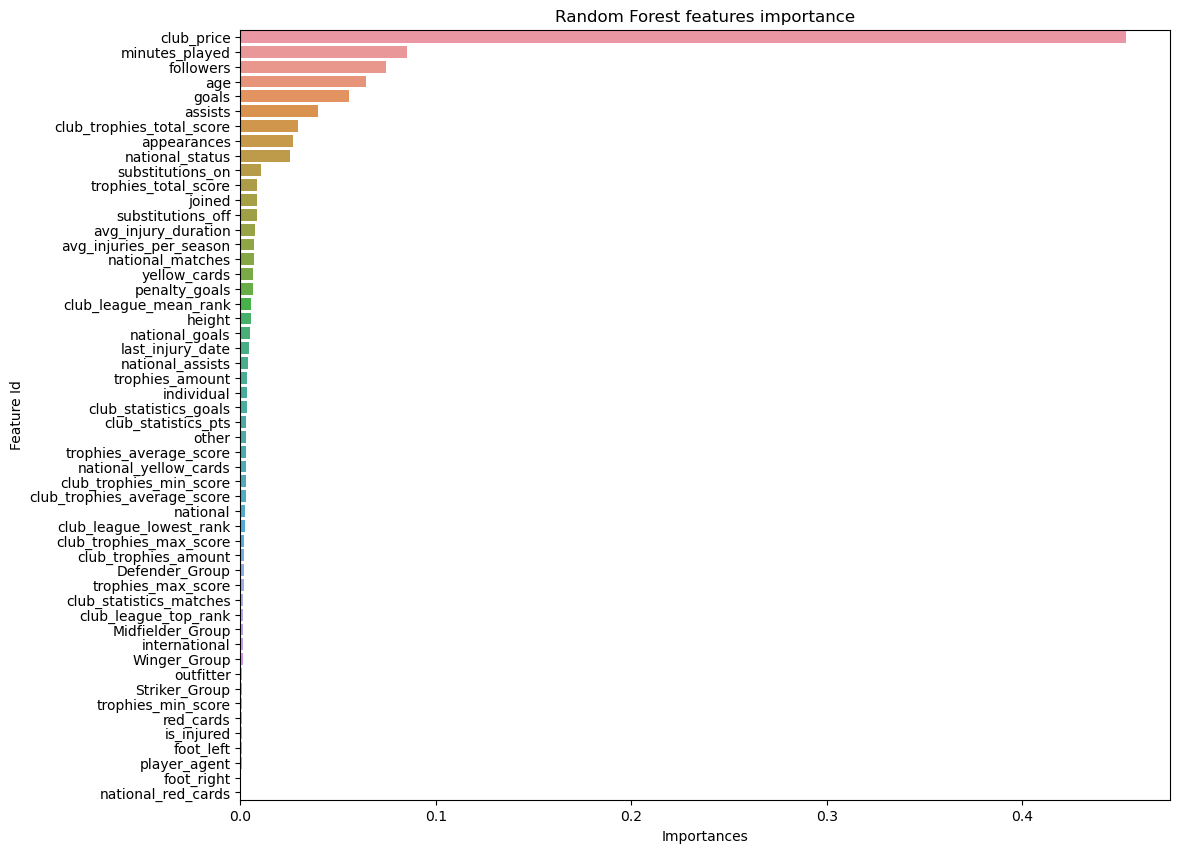

In [27]:
feature_importances = pd.DataFrame({
    'Feature Id': relevant_features,
    'Importances': rf_model.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importances', ascending=False)

# Create a plot of feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x="Importances", y="Feature Id", data=feature_importances)
plt.title("Random Forest features importance")
plt.show()

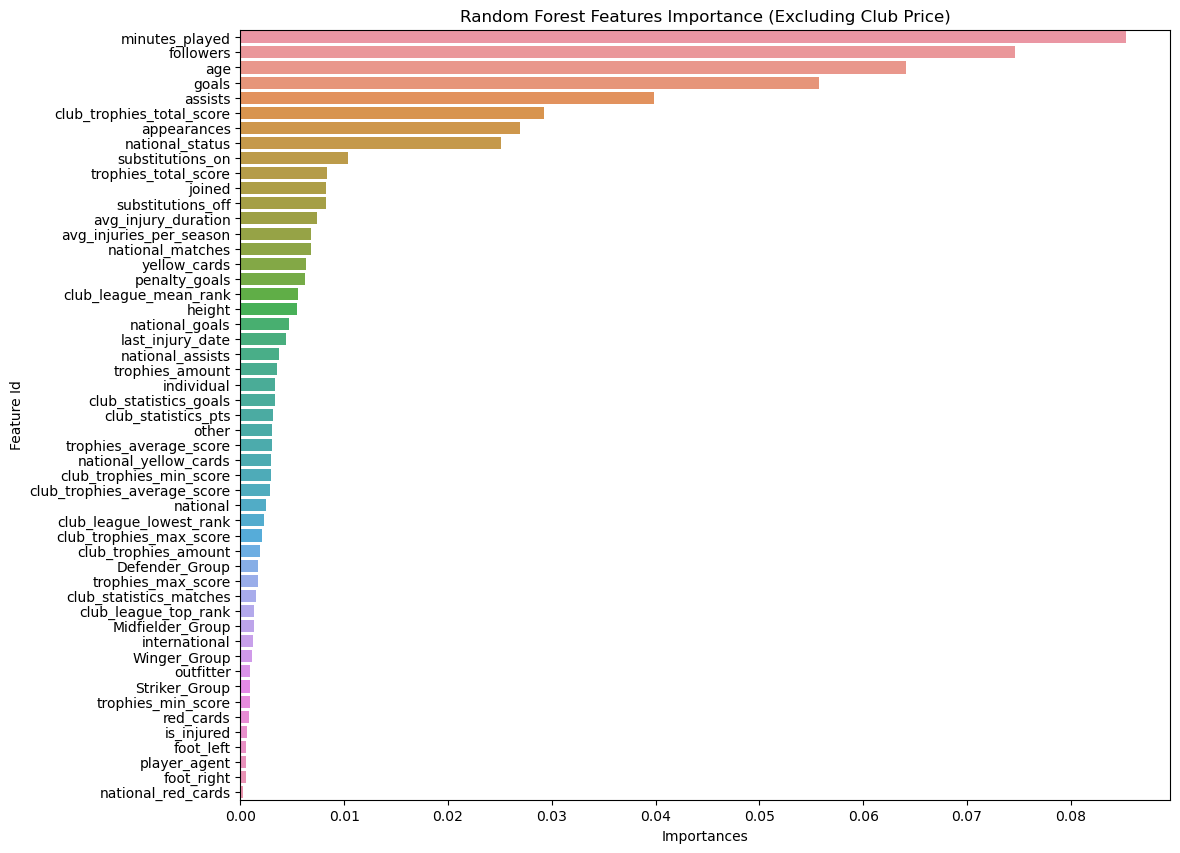

In [41]:
feature_index = relevant_features.index('club_price')
relevant_features.remove('club_price')
importances = list(rf_model.feature_importances_)
del importances[feature_index]


feature_importances = pd.DataFrame({
    'Feature Id': relevant_features,
    'Importances': importances
})

feature_importances = feature_importances.sort_values(by='Importances', ascending=False)

# Create a plot of feature importances
plt.figure(figsize=(12, 10))  # define the size of the plot
sns.barplot(x="Importances", y="Feature Id", data=feature_importances)
plt.title("Random Forest Features Importance (Excluding Club Price)")  # add a title to the plot
plt.show()

In [ ]:
# 